# Import the dataset

In [ ]:
# Install all the necessary libraries
!pip install numpy pandas matplotlib seaborn tabulate keras

In [1]:
# Import all the necessary libraries

# Basic mathematical libs
import numpy as np
import pandas as pd

# Basic plotting libs
import matplotlib.pyplot as plt
import seaborn as sb

# Basic machine learning libs
from sklearn.preprocessing import LabelEncoder, StandardScaler, FunctionTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline

# Basic deep learning libs
from keras import layers
from keras.layers import Input, Dense, Lambda
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.callbacks import ModelCheckpoint, TensorBoard
import keras.backend as K
import keras
import tensorflow as tf

# Table plotting enhancement libs
from tabulate import tabulate

# Basic libs to import libs from drive
from google.colab import drive
drive.mount('/content/drive')

# Filter all the unwanted warnings
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [2]:
# Define the new column names for easier access of columns
column_names=['user', 'card', 'year', 'month', 'day', 'time', 'amount', 'chip', 'merchant_name', 'merchant_city', 'merchant_state', 'zip_code', 'mcc', 'errors', 'fraud']

# Import the card-transactions dataset
df = pd.read_csv(
        filepath_or_buffer='/content/drive/My Drive/datasets/card_transaction.v1.csv',
        sep=',',
        header='infer',
        names=column_names,
        skiprows=1)

print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid'))

╒════╤════════╤════════╤════════╤═════════╤═══════╤════════╤══════════╤═══════════════════╤═════════════════╤═════════════════╤══════════════════╤════════════╤═══════╤══════════╤═════════╕
│    │   user │   card │   year │   month │   day │ time   │ amount   │ chip              │   merchant_name │ merchant_city   │ merchant_state   │   zip_code │   mcc │   errors │ fraud   │
╞════╪════════╪════════╪════════╪═════════╪═══════╪════════╪══════════╪═══════════════════╪═════════════════╪═════════════════╪══════════════════╪════════════╪═══════╪══════════╪═════════╡
│  0 │      0 │      0 │   2002 │       9 │     1 │ 06:21  │ $134.09  │ Swipe Transaction │     3.52721e+18 │ La Verne        │ CA               │      91750 │  5300 │      nan │ No      │
├────┼────────┼────────┼────────┼─────────┼───────┼────────┼──────────┼───────────────────┼─────────────────┼─────────────────┼──────────────────┼────────────┼───────┼──────────┼─────────┤
│  1 │      0 │      0 │   2002 │       9 │     1 │ 06:

# Get statistical measures of dataset

In [3]:
# Getting the insights of the data for further processing

# To get the size of the data
print('There are %d datapoints and %d features for the data' % df.shape)
print('\n', '-'*100, '\n')

# To get type summary of the numerical columns in df
print('Type Information values')
print(df.info())
print('\n', '-'*100, '\n')

# To get statistical summary of the numerical columns in df
print('Standard statistical values')
print(df.describe())
print('\n', '-'*100, '\n')

# To get the total count of nan values in each column
print('Count of nan values')
print(df.isna().sum())
print('\n', '-'*100, '\n')

# To get the total count of duplicate values in each column
print('Count of duplicate rows')
print(df.duplicated().sum())
print('\n', '-'*100, '\n')

There are 2555190 datapoints and 15 features for the data

 ---------------------------------------------------------------------------------------------------- 

Type Information values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555190 entries, 0 to 2555189
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user            int64  
 1   card            int64  
 2   year            int64  
 3   month           int64  
 4   day             int64  
 5   time            object 
 6   amount          object 
 7   chip            object 
 8   merchant_name   float64
 9   merchant_city   object 
 10  merchant_state  object 
 11  zip_code        float64
 12  mcc             float64
 13  errors          object 
 14  fraud           object 
dtypes: float64(3), int64(5), object(7)
memory usage: 292.4+ MB
None

 ---------------------------------------------------------------------------------------------------- 

Standard statistical values
     

In [4]:
# Get more insights for the columns

# To get the different merchant state names
print('Different merchant states')
print(df['merchant_state'].value_counts())
print('\n\nTotal number of merchant states ', len(df['merchant_state'].value_counts()))
print('\n', '-'*100, '\n')

# To get the different merchant city names
print('Different merchant city')
print(df['merchant_city'].value_counts())
print('\n\nTotal number of merchant city ', len(df['merchant_city'].value_counts()))
print('\n', '-'*100, '\n')

# To get the different zip-codes
print('Different zip codes')
print(df['zip_code'].value_counts())
print('\n\nTotal number of zip codes ', len(df['zip_code'].value_counts()))
print('\n', '-'*100, '\n')

# To get the different chip
print('Different chips names')
print(df['chip'].value_counts())
print('\n\nTotal number of chip names', len(df['chip'].value_counts()))
print('\n', '-'*100, '\n')

# To get the different errors
print('Different errors')
print(df['errors'].value_counts())
print('\n\nTotal number of errors', len(df['errors'].value_counts()))
print('\n', '-'*100, '\n')

# To get check for max-min values for year, month, day
print('Range for the year : ', df['year'].min(), ' -> ', df['year'].max())
print('Range for the month : ', df['month'].min(), ' -> ', df['month'].max())
print('Range for the day : ', df['day'].min(), ' -> ', df['day'].max())
print('Range for the time : ', df['time'].min(), ' -> ', df['time'].max())

print('\n', '-'*100, '\n')


Different merchant states
merchant_state
CA              254380
TX              230507
FL              175642
AZ              134591
NY              123196
                 ...  
Macedonia            3
Micronesia           3
Slovakia             2
Samoa                1
Sierra Leone         1
Name: count, Length: 144, dtype: int64


Total number of merchant states  144

 ---------------------------------------------------------------------------------------------------- 

Different merchant city
merchant_city
 ONLINE        321040
Tucson          58444
Oakland         39543
Houston         39423
Acworth         39289
                ...  
Nalcrest            1
Altaville           1
Toulon              1
New Freedom         1
Knapp               1
Name: count, Length: 7901, dtype: int64


Total number of merchant city  7901

 ---------------------------------------------------------------------------------------------------- 

Different zip codes
zip_code
30101.0    39255
85711.0    296

**Observations for the card-transactions dataset before-pre-plotting**

1. There in high imbalance of entries among columns merchant_state, zip_code, errors, fraud.
2. Most of the values for the error column are nans which  doesn't provide significant information for analysis, hence should be dropped.
3. There are very less nans in fraud and mcc, hence this datapoint we can delete.
4. There are some duplicate rows which can be dropped.
5. Month, Day and Time having desired values.
6. There is '$' in the Amount which needs to be removed to make values to float

# Perform Preprocessing of dataset

In [5]:
# Perform some operations on dataset to get it ready to implement model

# Define different label encoder variables
merchant_state_label_encoder = LabelEncoder()
merchant_city_label_encoder = LabelEncoder()
zip_code_label_encoder = LabelEncoder()
chip_label_encoder = LabelEncoder()
errors_label_encoder = LabelEncoder()
fraud_encoder = LabelEncoder()


def preprocess_data_credit_card_v1(df):

    # Handle all the nan values
    df['merchant_state'] = df['merchant_state'].fillna('new_state')  # create a new merchant state
    df['zip_code'] = df['zip_code'].fillna(00000)  # create a new zip code
    df['chip'] = df['chip'].fillna('new_chip')  # create a new chip
    df['errors'] = df['errors'].fillna('new_errors')  # create a new errors
    df.dropna(subset=['mcc'], inplace=True) # drop the row with nan values for mcc
    df.dropna(subset=['fraud'], inplace=True) # drop the row with nan values for mcc
    df.dropna(subset=['merchant_city'], inplace=True) # drop the row with nan values for merchant_city
    df.dropna(subset=['merchant_name'], inplace=True) # drop the row with nan values for merchant_name
    df.dropna(subset=['chip'], inplace=True) # drop the row with nan values for chip
    df.dropna(subset=['amount'], inplace=True) # drop the row with nan values for amount

    # Handle the duplicate rows
    df = df.drop_duplicates() # drop duplicate rows
    df.reset_index(drop=True, inplace=True) # reset the index

    # Handle the non-numeric columns
    df['merchant_state'] = merchant_state_label_encoder.fit_transform(df['merchant_state'])
    df['merchant_city'] = merchant_city_label_encoder.fit_transform(df['merchant_city'])
    df['zip_code'] = zip_code_label_encoder.fit_transform(df['zip_code'])
    df['chip'] = chip_label_encoder.fit_transform(df['chip'])
    df['errors'] = errors_label_encoder.fit_transform(df['errors'])
    df['fraud'] = fraud_encoder.fit_transform(df['fraud'])

    # Handle data conversions
    df['amount']=df['amount'].str.replace('$','').astype(float) # remove $ sign
    df['hour'] = df['time'].str[0:2].astype(float) # get hour from time and add to df
    df['minute'] = df['time'].str[3:5].astype(float) # get minute from time and add to df
    df = df.drop(['time'],axis=1) # remove time from data

    return df

preprocessing_pipeline = Pipeline([
    ('cleaning', FunctionTransformer(preprocess_data_credit_card_v1, validate=False)),
], verbose=True)

df = preprocessing_pipeline.fit_transform(df)

[Pipeline] .......... (step 1 of 1) Processing cleaning, total=  14.3s


# Perform Exploratory Dataset Analysis

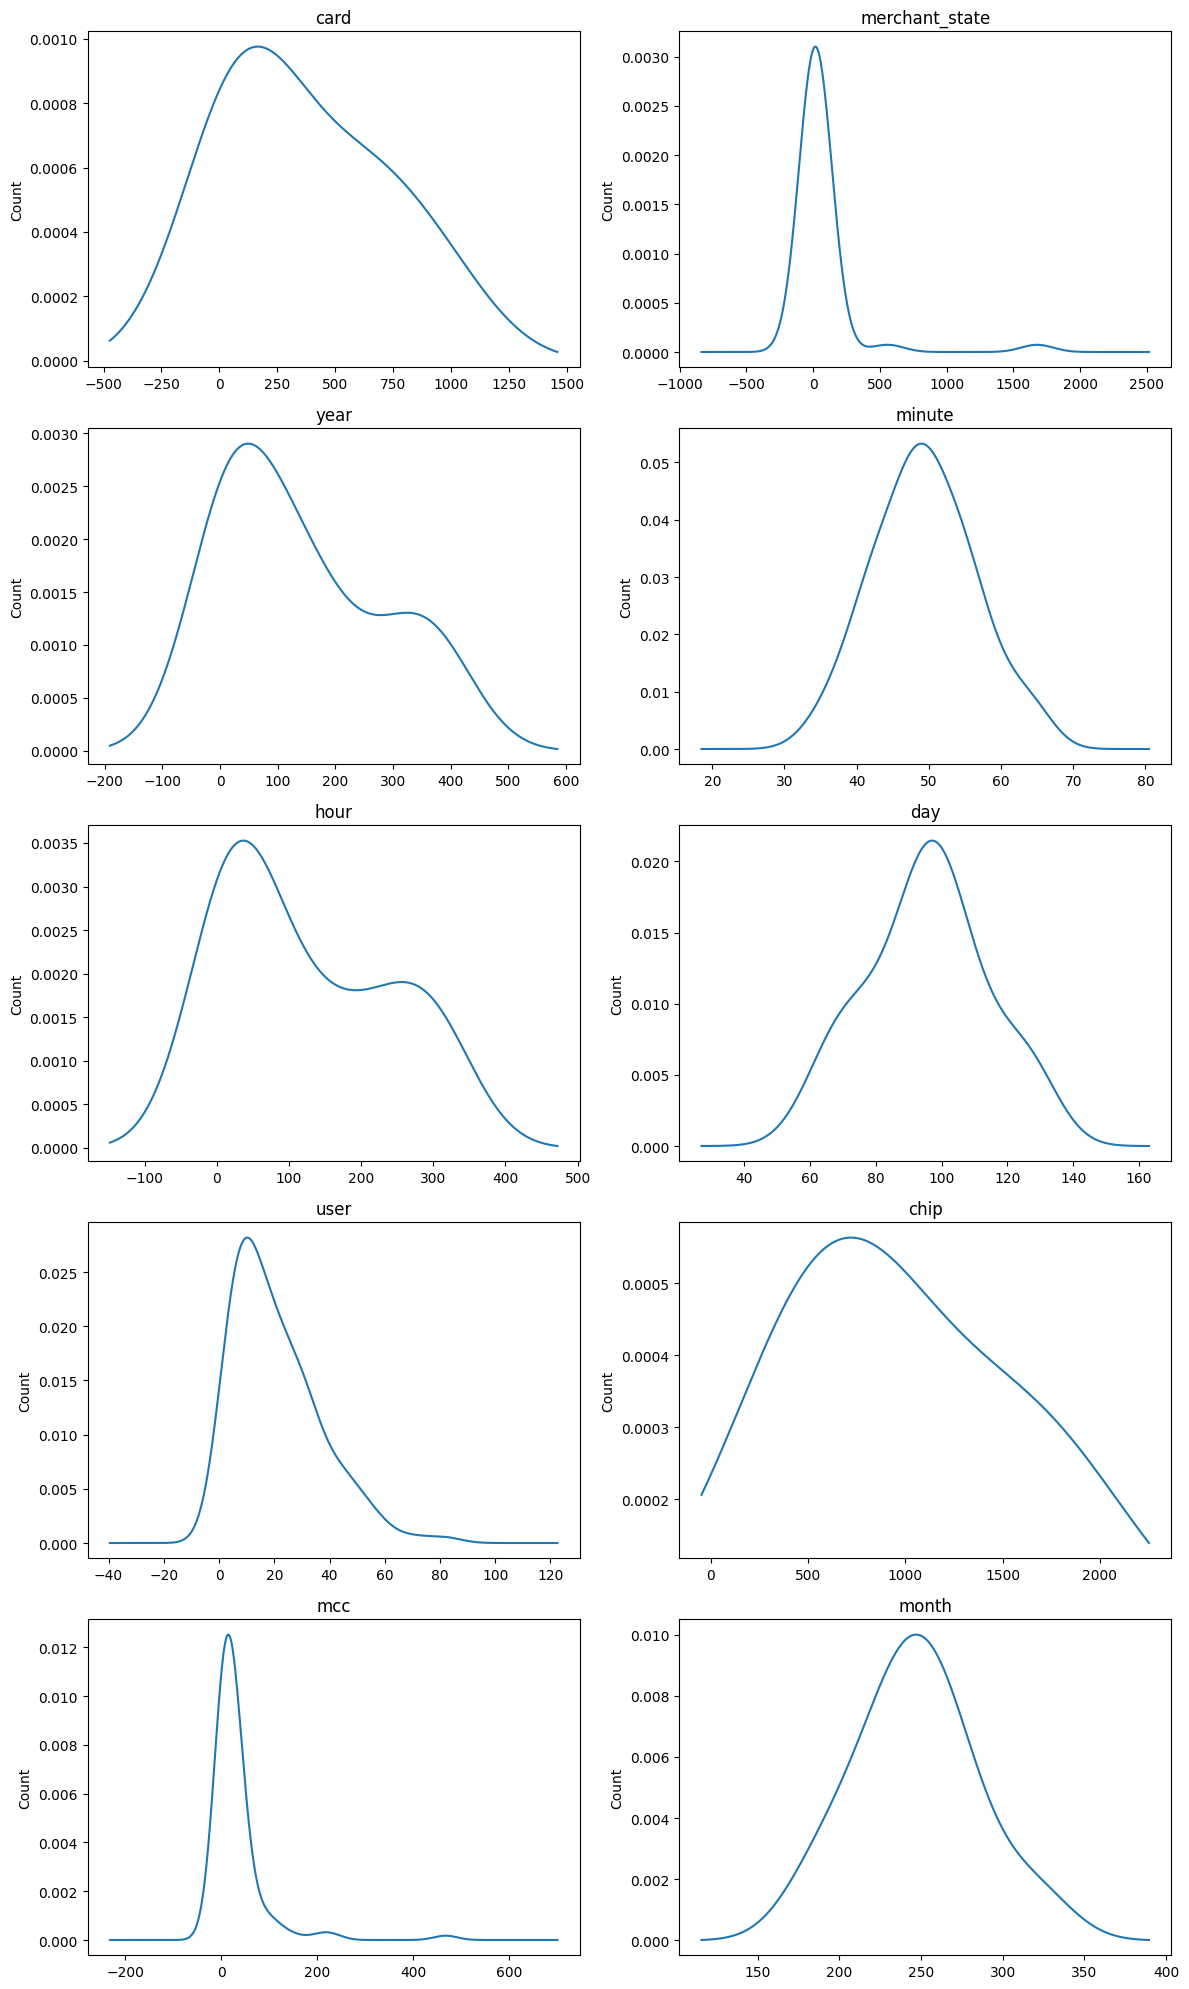

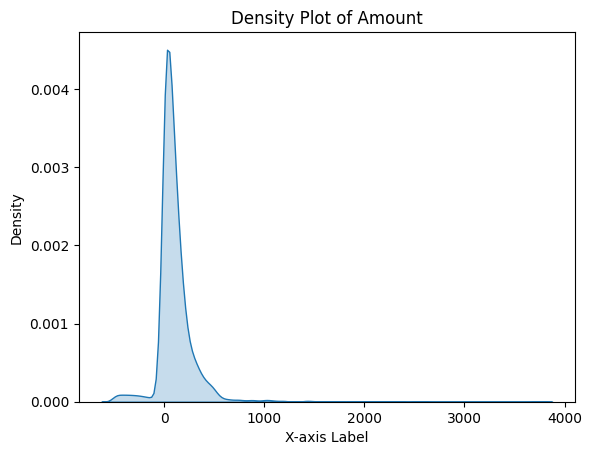

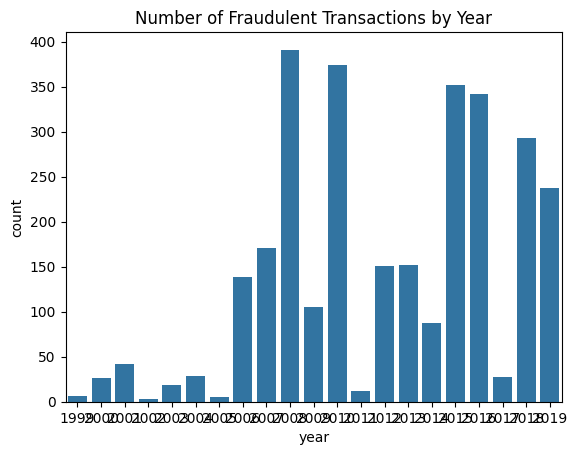

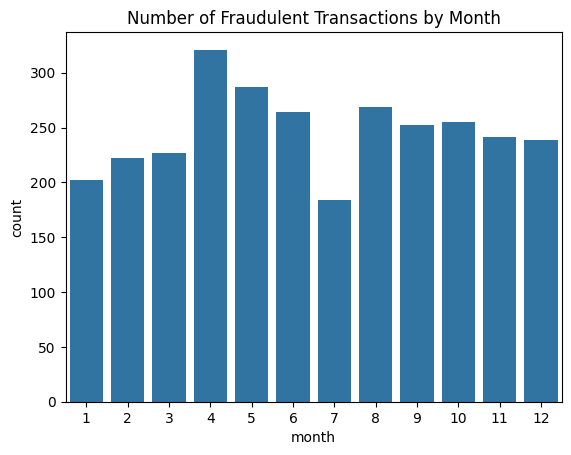

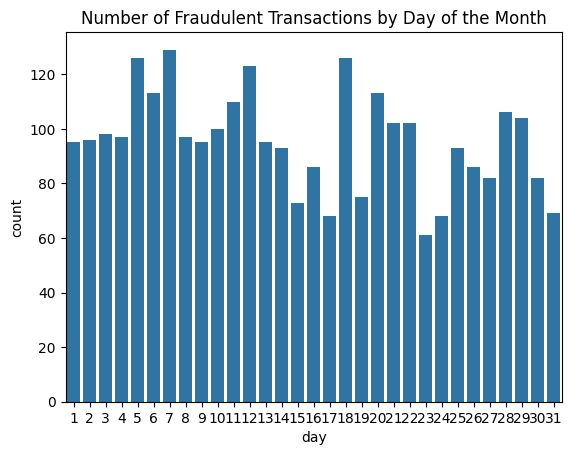

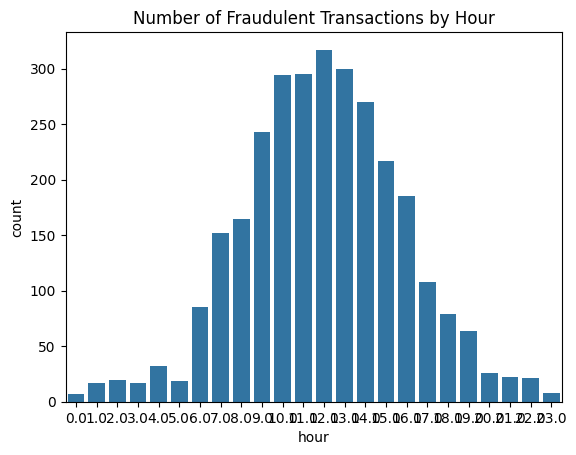

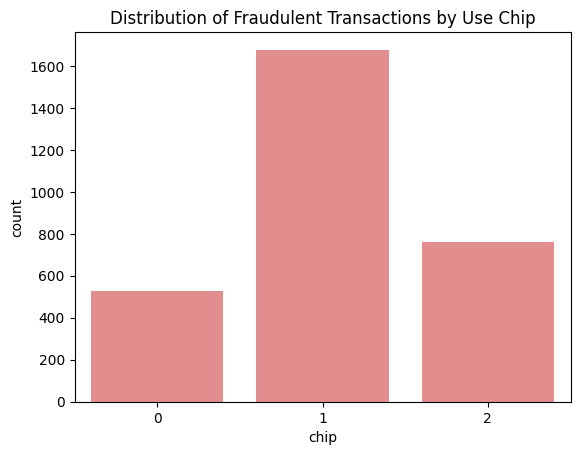

In [6]:
# Observing the fraud transactions
fraud_df = df[df['fraud'] == 1]


# Categorical columns
cat_cols = set(fraud_df.columns)-set(['amount', 'fraud', 'merchant_name', 'merchant_city', 'zip_code', 'errors'])
num_cols = 2
num_rows = (len(cat_cols) + 1) // 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))
if len(cat_cols) > 1:
    axes = axes.flatten()
for i, col in enumerate(cat_cols):
    ax = axes[i]
    fraud_df[col].value_counts().plot(kind='kde', ax=ax)
    ax.set_title(col)
    ax.set_ylabel('Count')
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()


# Numerical columns
sb.kdeplot(fraud_df['amount'], shade=True)
plt.xlabel('X-axis Label')
plt.ylabel('Density')
plt.title('Density Plot of Amount')
plt.show()


# Time variations
sb.countplot(data=fraud_df, x='year')
plt.title('Number of Fraudulent Transactions by Year')
plt.show()

sb.countplot(data=fraud_df, x='month')
plt.title('Number of Fraudulent Transactions by Month')
plt.show()

sb.countplot(data=fraud_df, x='day')
plt.title('Number of Fraudulent Transactions by Day of the Month')
plt.show()

sb.countplot(data=fraud_df, x='hour', order=sorted(fraud_df['hour'].unique()))
plt.title('Number of Fraudulent Transactions by Hour')
plt.show()


# Transcation methods
sb.countplot(data=fraud_df, x='chip', color='lightcoral')
plt.title('Distribution of Fraudulent Transactions by Use Chip')
plt.show()

# Generate training and testing dataset

In [7]:
# Split the data as fraud vs non-fraud
non_fraud_df, fraud_df = df[df['fraud']==0], df[df['fraud']==1]

# To get the sizes of data
print('There are %d datapoints and %d features for the non-fraud data' % non_fraud_df.shape)
print('There are %d datapoints and %d features for the fraud data' % fraud_df.shape)
print('\n', '-'*100, '\n')

# % printing of data
print('% samples are non-fraud ', (non_fraud_df.shape[0]/df.shape[0]) *100)
print('% samples are fraud ', (fraud_df.shape[0]/df.shape[0]))
print('\n', '-'*100, '\n')

# Spliting the data for train
X_train = non_fraud_df.drop(columns=['fraud'], axis=1).sample(frac=0.66, random_state=42) # 2/3 of all samples
y_train = non_fraud_df['fraud']

# Get the indices of rows that are not in X_train
remaining_indices = non_fraud_df.index.difference(X_train.index)

# Random sampling of the transactions for fraud and non-fraud
non_fraud_df_sample = non_fraud_df.loc[remaining_indices] # 1/3 of all samples
fraud_df_sample = fraud_df
print('There are %d datapoints and %d features for the non-fraud data samples' % non_fraud_df_sample.shape)
print('There are %d datapoints and %d features for the fraud data samples' % fraud_df_sample.shape)
print('\n', '-'*100, '\n')

# To mix both dfs
combined_df = pd.concat([non_fraud_df_sample, fraud_df_sample], ignore_index=True)
combined_df = combined_df.sample(frac=1).reset_index(drop=True)
print('% samples are non-fraud ', (non_fraud_df_sample.shape[0]/combined_df.shape[0]) *100)
print('% samples are fraud ', (fraud_df_sample.shape[0]/combined_df.shape[0]) *100)
print('\n', '-'*100, '\n')

# Spliting the data for test
X_test  = combined_df.drop(columns=['fraud'], axis=1)
y_test  = combined_df['fraud']

non_fraud_df = X_train

# Standardized the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


There are 2552219 datapoints and 16 features for the non-fraud data
There are 2963 datapoints and 16 features for the fraud data

 ---------------------------------------------------------------------------------------------------- 

% samples are non-fraud  99.88403957134952
% samples are fraud  0.001159604286504836

 ---------------------------------------------------------------------------------------------------- 

There are 867754 datapoints and 16 features for the non-fraud data samples
There are 2963 datapoints and 16 features for the fraud data samples

 ---------------------------------------------------------------------------------------------------- 

% samples are non-fraud  99.65970573676637
% samples are fraud  0.34029426323363393

 ---------------------------------------------------------------------------------------------------- 



# Variational Autoencoder

Variational Autoencoder Layer Structure
Autoencoder has symmetric encoding and decoding layers which are Dense in nature.
We are trying to reduce the input into some form of simplified encoding and then expanding it again.
The input and output dimension is the feature space of 15 dims, so the encoding layer should be larger by an amount that expect to represent some feature.
In this case, We tried to encode 15 feature columns into 32 dims so we are expecting high-level features to be represented by roughly 2 columns
Of those high-level features, We are expecting them to map to roughly 8 latent features/dims/mapping-distributions in the data.


In [8]:
# Define the input layer
input_layer = Input(shape = (X_train.shape[1], ))

# Construct encoder network
encoded = Dense(32, activation= layers.LeakyReLU(alpha=0.01), activity_regularizer=regularizers.l1(1e-7))(input_layer)
encoded = Dense(16, activation='relu', activity_regularizer=regularizers.l1(1e-7))(encoded)

# Define the mean and log-variance layers
latent_dims=8
z_mean = Dense(latent_dims)(encoded)
z_log_var = Dense(latent_dims)(encoded)
epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dims), mean=0., stddev=1.)
z = z_mean + K.exp(0.5 * z_log_var) * epsilon

encoder = Model(input_layer, outputs = [z_mean, z_log_var, z], name = 'encoder')


# Decoder network
decoder_input = Input(shape=(latent_dims,))
decoded = decoder_input

decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(32, activation=layers.LeakyReLU(alpha=0.01))(decoded)
decoded = Dense(X_train.shape[1], activation='elu')(decoded)
decoder = Model(decoder_input, decoded, name='decoder')


def reconstruction_loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))


def kl_loss(mu, log_var):
    loss = -0.5 * tf.reduce_mean(1 + log_var - tf.square(mu) - tf.exp(log_var))
    return loss

# Create the autoencoder
z_mean, z_log_var, z = encoder(input_layer)
reconstructed=decoder(z)
auto_encoder = Model(input_layer, reconstructed, name='vae')

reconstruction_loss_get = reconstruction_loss(input_layer, reconstructed)
kl_loss_get=kl_loss(z_mean, z_log_var)
vae_loss_get = K.mean(reconstruction_loss_get + kl_loss_get)
auto_encoder.add_loss(vae_loss_get)

# compile the model
auto_encoder.compile(optimizer='adam')

# Print the actual layers of model
print(auto_encoder.summary())

# Saving the model temporarily
cp = ModelCheckpoint(filepath='autoencoder.h5',save_best_only=True,verbose=0)

# To visualize dynamic graphs
tb = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)

# Train the model
history = auto_encoder.fit(X_train, X_train, batch_size=128, epochs=32, shuffle=True, validation_split=0.10, verbose='1', callbacks=[cp, tb]).history

# Load the trained model
autoencoder = load_model('autoencoder.h5')


Model: "vae"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 15)]                 0         []                            
                                                                                                  
 encoder (Functional)        [(None, 8),                  1312      ['input_1[0][0]']             
                              (None, 8),                                                          
                              (None, 8)]                                                          
                                                                                                  
 decoder (Functional)        (None, 15)                   1183      ['encoder[0][2]']             
                                                                                                

# Observing trained model

In [9]:
# Evaluate the model
reconstructed_data = auto_encoder.predict(X_test)
mse_total = np.mean(np.square(X_test - reconstructed_data))
print("Mean Squared Error on total test :", mse_total)

# Evaluate the model for non-fraud samples
indices_non_fraud_test = y_test==0
n_fraud=X_test[indices_non_fraud_test]
recon=auto_encoder.predict(n_fraud)

mse_n_fraud_per_sample = np.mean(np.square(n_fraud - recon), axis=1)
mse_n_fraud = np.mean(mse_n_fraud_per_sample)
print("Mean Squared Error on non fraud test :", mse_n_fraud)

# Evaluate the model for fraud samples
indices_fraud_test = y_test==1
fraud=X_test[indices_fraud_test]
recon=auto_encoder.predict(fraud)

mse_fraud_per_sample = np.mean(np.square(fraud - recon), axis=1)
mse_fraud = np.mean(mse_fraud_per_sample)
print("Mean Squared Error on fraud test :", mse_fraud)

27210/27210 [==============================] - 50s 2ms/step
Mean Squared Error on total test : 0.0702478463038117
27118/27118 [==============================] - 47s 2ms/step
Mean Squared Error on non fraud test : 0.07021936977374986
93/93 [==============================] - 0s 2ms/step
Mean Squared Error on fraud test : 0.07858757716674954


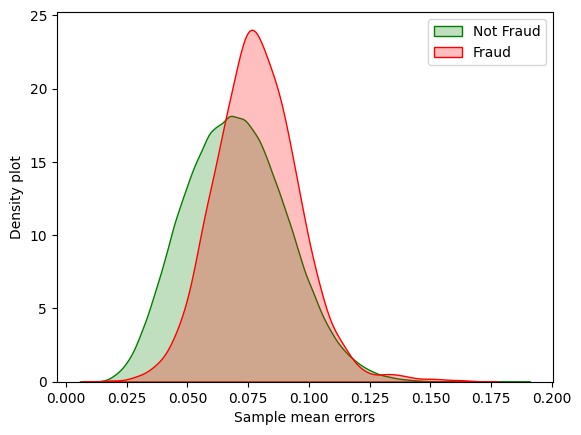

In [10]:
# Observe the different mse errors per samples
fig = sb.kdeplot(data=mse_n_fraud_per_sample, color='green', shade=True)
fig = sb.kdeplot(data=mse_fraud_per_sample, ax=fig, color='red', shade=True)
fig.set_xlabel('Sample mean errors')
fig.set_ylabel('Density plot')
fig = fig.legend(['Not Fraud', 'Fraud'])

# Generate the Syntehetic data points

In [ ]:
# Sample non-fraudulant points from the distibutions generated

# Extract the values of the mean and log variances
lst=[]
for layer in auto_encoder.get_weights():
    if(layer.ndim==1 and layer.shape[0]==latent_dims):
        lst.append(layer)
means, variances = lst[0], np.exp(lst[1] * 1e5)

# Scale the values of means and variances adjusted according to the given feature statistical metrics
scaled_means = means * 1e6
scaled_variances = variances * 1e1

# Assuming these means and variances comes from a normal distribution we sample 2 million synthetic points
num_points=2_000_000

# Create empty array for the samples
synthetic_data_samples = np.empty((num_points, X_train.shape[1]))

for i in range(num_points):
    print(i+1)
    # generate a synthetic sample
    latent_sample = np.random.normal(loc=scaled_means, scale=np.sqrt(scaled_variances))

    # Pass these samples through the decoder
    synthetic_data_samples[i] = decoder.predict(latent_sample.reshape(1, -1))[0]

# Pass these samples through the decoder
synthetic_data_samples.shape

In [ ]:
column_names=['user', 'card', 'year', 'month', 'day', 'amount', 'chip', 'merchant_name', 'merchant_city', 'merchant_state', 'zip_code', 'mcc', 'errors', 'hour', 'minute']
synthetic_data = pd.DataFrame(data=synthetic_data_samples[:37000,:], columns=column_names)
synthetic_data.shape

In [ ]:
synthetic_data.describe()

# Perform Postprocessing of dataset

In [34]:
# Post Perform some operations on dataset to get it ready to implement model
merchant_state_label_encoder_inverse = LabelEncoder()
merchant_city_label_encoder_inverse = LabelEncoder()
zip_code_label_encoder_inverse = LabelEncoder()
chip_label_encoder_inverse = LabelEncoder()
errors_label_encoder_inverse = LabelEncoder()


def postprocess_data_credit_card_v1_1(df):

    df['merchant_state'] = pd.cut(df['merchant_state'], bins=len(merchant_state_label_encoder.classes_), labels=False, retbins=False) + 1

    df['merchant_city'] = pd.cut(df['merchant_city'], bins=len(merchant_city_label_encoder.classes_), labels=False, retbins=False) + 1

    df['zip_code'] = pd.cut(df['zip_code'], bins=len(zip_code_label_encoder.classes_), labels=False, retbins=False) + 1

    df['chip'] = pd.cut(df['chip'], bins=len(chip_label_encoder.classes_), labels=False, retbins=False) + 1

    df['errors'] = pd.cut(df['errors'], bins=len(errors_label_encoder.classes_), labels=False, retbins=False) + 1

    df['month'] = pd.cut(df['month'], bins=12, labels=False, retbins=False) + 1

    df['day'] = pd.cut(df['day'], bins=31, labels=False, retbins=False) + 1

    df['user'] = pd.cut(df['user'], bins=200, labels=False, retbins=False) + 1

    df['card'] = pd.cut(df['card'], bins=8, labels=False, retbins=False) + 1

    df['year'] = pd.cut(df['year'], bins=30, labels=False, retbins=False) + 1

    return df

postprocessing_pipeline = Pipeline([
    ('retriving_1', FunctionTransformer(postprocess_data_credit_card_v1_1, validate=False)),
], verbose=True)

new_df = postprocessing_pipeline.fit_transform(synthetic_data)
print(tabulate(new_df.head(), headers='keys', tablefmt='fancy_grid'))

[Pipeline] ....... (step 1 of 1) Processing retriving_1, total=   0.0s
╒════╤════════╤════════╤════════╤═════════╤═══════╤═══════════╤════════╤═════════════════╤═════════════════╤══════════════════╤════════════╤══════════╤══════════╤══════════╤══════════╕
│    │   user │   card │   year │   month │   day │    amount │   chip │   merchant_name │   merchant_city │   merchant_state │   zip_code │      mcc │   errors │     hour │   minute │
╞════╪════════╪════════╪════════╪═════════╪═══════╪═══════════╪════════╪═════════════════╪═════════════════╪══════════════════╪════════════╪══════════╪══════════╪══════════╪══════════╡
│  0 │    136 │      6 │     19 │       9 │    21 │ 0.0852542 │      2 │        0.465758 │            5577 │               72 │       9938 │ 0.527549 │       16 │ 0.515883 │ 0.548113 │
├────┼────────┼────────┼────────┼─────────┼───────┼───────────┼────────┼─────────────────┼─────────────────┼──────────────────┼────────────┼──────────┼──────────┼──────────┼──────────┤
│  1

In [35]:
# Post Perform some operations on dataset to get the final dataset similar to original values
def postprocess_data_credit_card_v1_2(df):

    df['merchant_state'] = merchant_state_label_encoder_inverse.fit_transform(df['merchant_state'])
    df['merchant_state'] = merchant_state_label_encoder.inverse_transform(df['merchant_state'])

    df['merchant_city'] = merchant_city_label_encoder_inverse.fit_transform(df['merchant_city'])
    df['merchant_city'] = merchant_city_label_encoder.inverse_transform(df['merchant_city'])

    df['zip_code'] = zip_code_label_encoder_inverse.fit_transform(df['zip_code'])
    df['zip_code'] = zip_code_label_encoder.inverse_transform(df['zip_code'])

    df['chip'] = chip_label_encoder_inverse.fit_transform(df['chip'])
    df['chip'] = chip_label_encoder.inverse_transform(df['chip'])

    df['errors'] = errors_label_encoder_inverse.fit_transform(df['errors'])
    df['errors'] = errors_label_encoder.inverse_transform(df['errors'])


    min_value_hour, max_value_hour, new_min_hour, new_max_hour = df['hour'].min(), df['hour'].max(), 0, 23
    df['hour'] = ((df['hour'] - min_value_hour) / (max_value_hour - min_value_hour)) * (new_max_hour - new_min_hour) + new_min_hour
    df['hour'] = df['hour'].round().astype(int)

    min_value_minute, max_value_minute, new_min_minute, new_max_minute = df['minute'].min(), df['minute'].max(), 0, 59
    df['minute'] = ((df['minute'] - min_value_minute) / (max_value_minute - min_value_minute)) * (new_max_minute - new_min_minute) + new_min_minute
    df['minute'] = df['minute'].round().astype(int)

    df['time'] = df['hour'].astype(str) + ':' + df['minute'].astype(str)
    df = df.drop(['hour'],axis=1) # remove hour from data
    df = df.drop(['minute'],axis=1) # remove minute from data


    min_value_amount, max_value_amount, new_min_amount, new_max_amount = df['amount'].min(), df['amount'].max(), -500, 1000
    df['amount'] = ((df['amount'] - min_value_amount) / (max_value_amount - min_value_amount)) * (new_max_amount - new_min_amount) + new_min_amount
    df['amount'] = df['amount'].round().astype(int)

    return df

postprocessing_pipeline = Pipeline([
    ('retriving_2', FunctionTransformer(postprocess_data_credit_card_v1_2, validate=False)),
], verbose=True)

new_df = postprocessing_pipeline.fit_transform(new_df)
print(tabulate(new_df.head(), headers='keys', tablefmt='fancy_grid'))

[Pipeline] ....... (step 1 of 1) Processing retriving_2, total=   0.1s
╒════╤════════╤════════╤════════╤═════════╤═══════╤══════════╤════════════════════╤═════════════════╤═════════════════╤══════════════════╤════════════╤══════════╤══════════════════════════════════╤════════╕
│    │   user │   card │   year │   month │   day │   amount │ chip               │   merchant_name │ merchant_city   │ merchant_state   │   zip_code │      mcc │ errors                           │ time   │
╞════╪════════╪════════╪════════╪═════════╪═══════╪══════════╪════════════════════╪═════════════════╪═════════════════╪══════════════════╪════════════╪══════════╪══════════════════════════════════╪════════╡
│  0 │    136 │      6 │     19 │       9 │    21 │      207 │ Online Transaction │        0.465758 │ Looneyville     │ Lithuania        │      43518 │ 0.527549 │ Bad PIN,Technical Glitch,        │ 13:36  │
├────┼────────┼────────┼────────┼─────────┼───────┼──────────┼────────────────────┼─────────────────┼

In [36]:
# Writing DataFrame to CSV file
new_df.to_csv('final_synthetic_data.csv', index=False)

# Visualizing final results

In [73]:
# Final Results Obtained original Vs Synthetic Data
original_data_non_fraud_final = non_fraud_df
synthetic_data_non_fraud_final = pd.read_csv('final_synthetic_data_1.csv', skiprows=0)

# Apply the label encoder on data samples
original_data_non_fraud_final = original_data_non_fraud_final.apply(LabelEncoder().fit_transform)
synthetic_data_non_fraud_final = synthetic_data_non_fraud_final.apply(LabelEncoder().fit_transform)

# Apply the MinMaxScaler
original_scaler = MinMaxScaler()
synthetic_scaler = MinMaxScaler()

original_data = original_scaler.fit_transform(original_data_non_fraud_final.drop(['hour', 'minute'], axis=1))
synthetic_data = synthetic_scaler.fit_transform(synthetic_data_non_fraud_final.drop(['time'], axis=1))

# Convert Back to dataframe
column_names=['user', 'card', 'year', 'month', 'day', 'amount', 'chip', 'merchant_name', 'merchant_city', 'merchant_state', 'zip_code', 'mcc', 'errors']

original_data = pd.DataFrame(data=original_data, columns=column_names)
synthetic_data = pd.DataFrame(data=synthetic_data, columns=column_names)


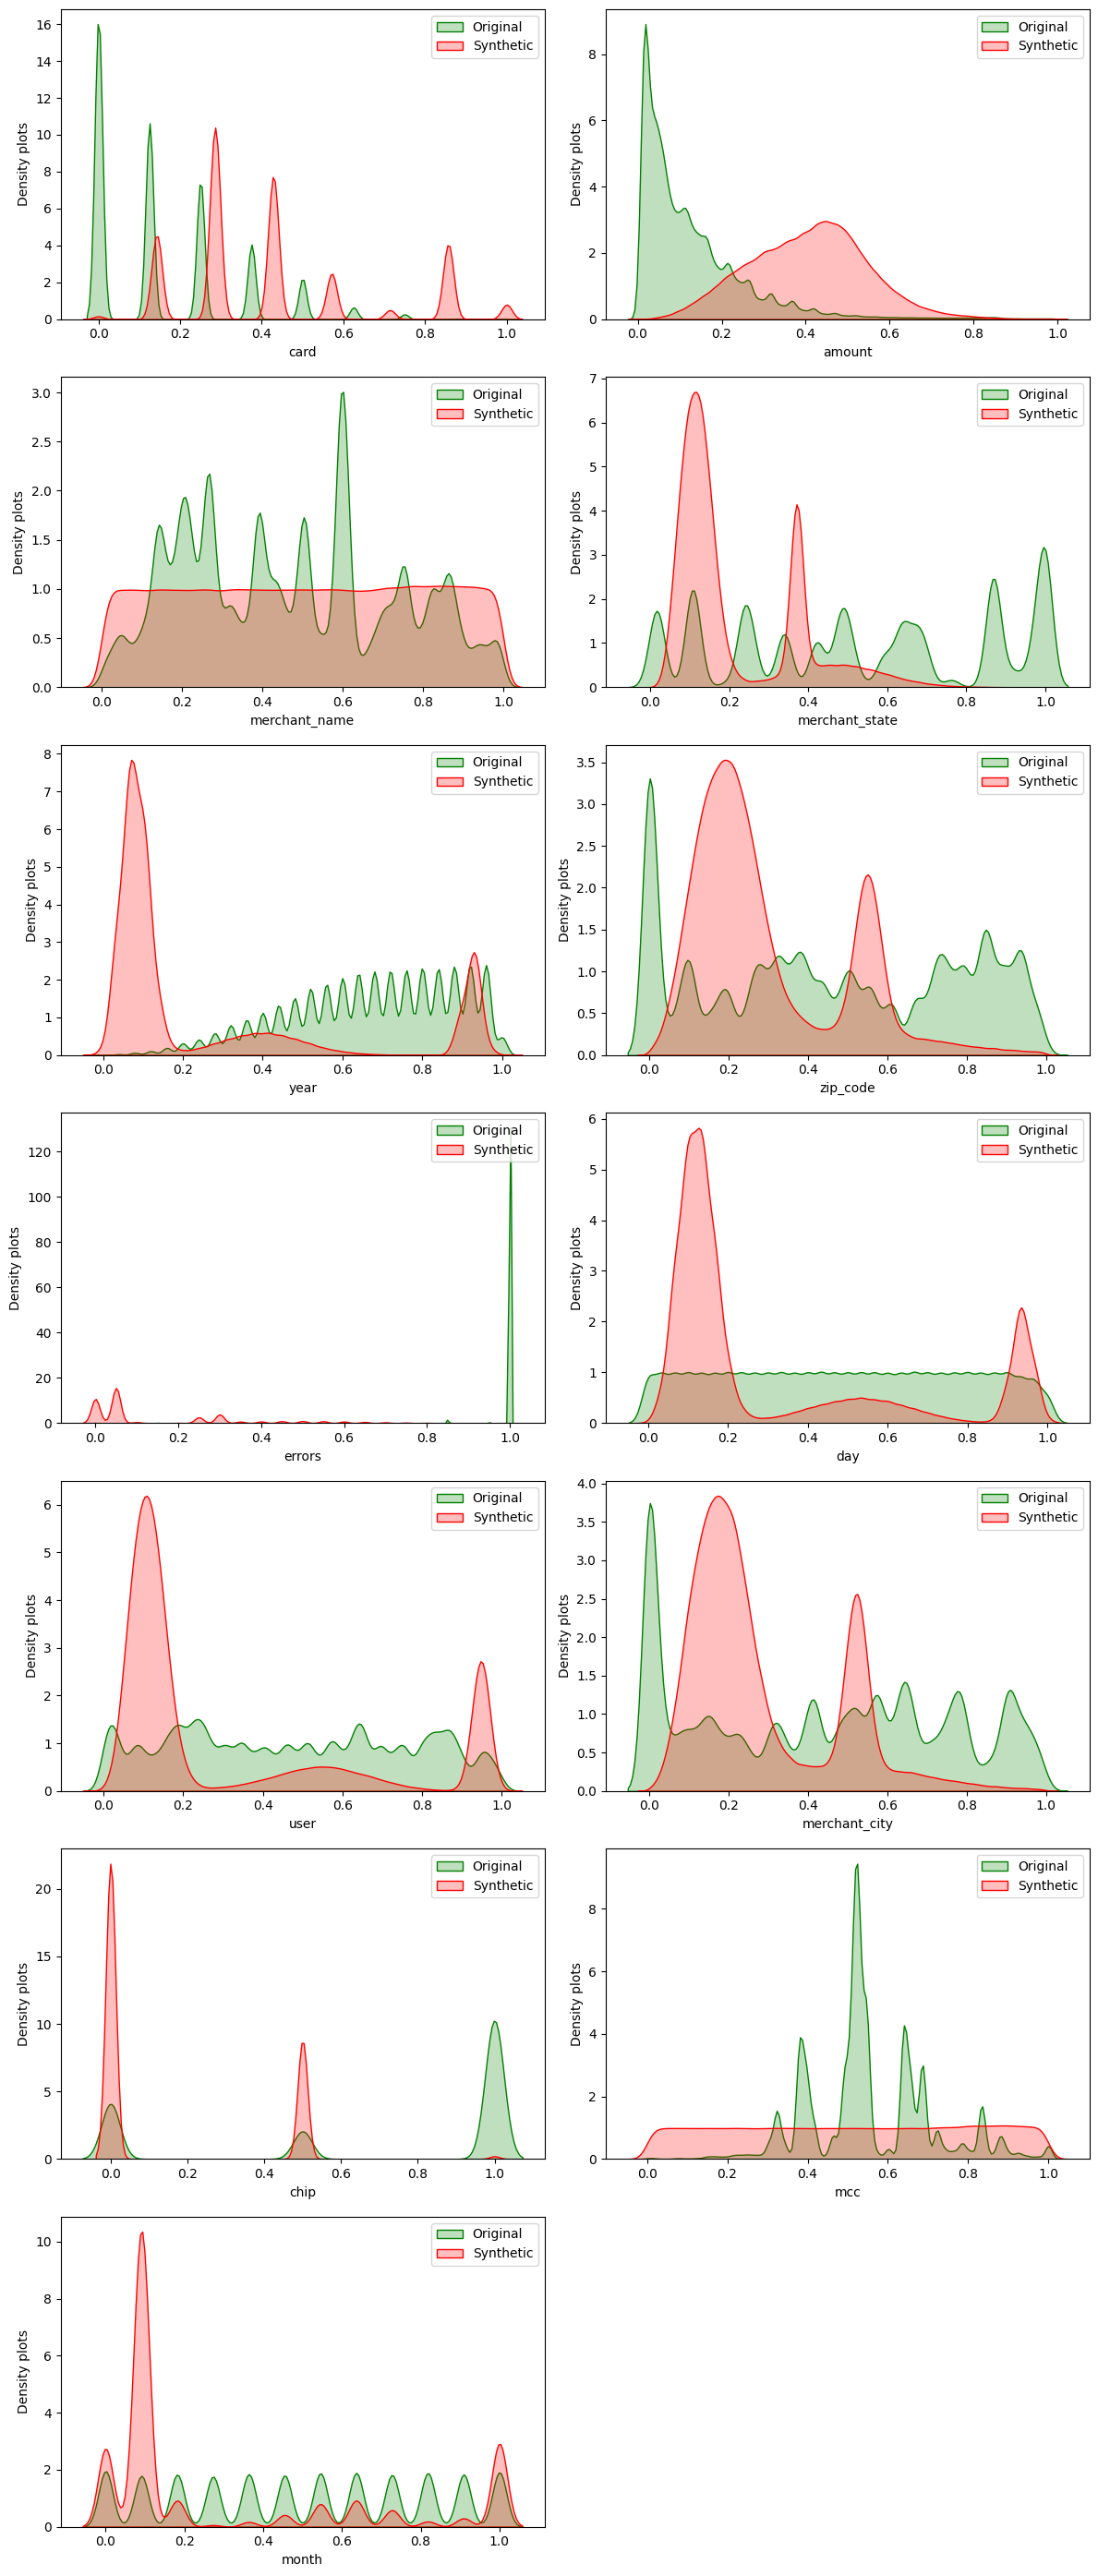

In [74]:
# KDE plots
cat_cols = set(original_data.columns)
num_cols = 2
num_rows = (len(cat_cols) + 1) // 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))
if len(cat_cols) > 1:
    axes = axes.flatten()
for i, col in enumerate(cat_cols):
    ax = axes[i]
    ax = sb.kdeplot(data=original_data[col], ax=ax, color='green', shade=True)
    ax = sb.kdeplot(data=synthetic_data[col], ax=ax, color='red', shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel('Density plots')
    ax = ax.legend(['Original', 'Synthetic'])
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()


# Conclusion

1. The dataset includes 2555190 samples in which each one has unique values distributed in 51 different features. Out of them, 2552219, we believe, are no scams while the others 2963 samples are fraudulent. This dataset comprises of no gaps that require filling and redundant transactions were removed to guarantee the reliability of data.


2. By analyzing the features, it can be seen that the relatively small group of them which have a normal (i.e., Gaussian) distribution. Contrarily, the distribution of fraud cases having a smaller size than the bin size does result in higher variance. The end of the distribution is the most controversial part when it comes to the variability of the data because one fraudulent action can massively affect the data. As a result, transaction volume alone does not work as a powerful tool for detecting fraud in such situations.


3. While we adopted the usual 66% non-fraud samples for training and 34% non-fraud samples & all fraud samples for testing, we followed the standard methodology of data splitting.

4. The indicated threshold has been set for the distinguishable results between the reconstructed non-fraudulent transaction and the fraudulent one at 0.076. The setting up of this critical parameter provides a vital standard for the identification of the false transaction from the authentic transactions in a manner that is at the same time both effective and elegant in its simplicity.

5. We focus on demonstrating the totally capability of the presented features. It will be made by a detailed evaluation, which shows a high-level similarity between them density plots. So, this combined distribution not only denotes the list of the data that could be examined but also offers the chance of looking at events that might have gone unnoticed by individual occurrences. We get an insight and act paragraph by paragraph and the sub-sections by sub-sections, which in turn, we reach to a higher level which is referred to as the conceptual understanding. As we get this point we are in a position where we can be certain to make optimal decisions with complete guarantee of success.
